# Electric Vehicle Sales by State in India

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("Electric Vehicle")

C:\Users\Rahul Singh\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Rahul Singh\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [4]:
data.describe()

,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [5]:
data.shape

(96845, 8)

### Changing date format 

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
data['Year'] = data['Year'].astype(int)

###  Vehicle Category Distribution

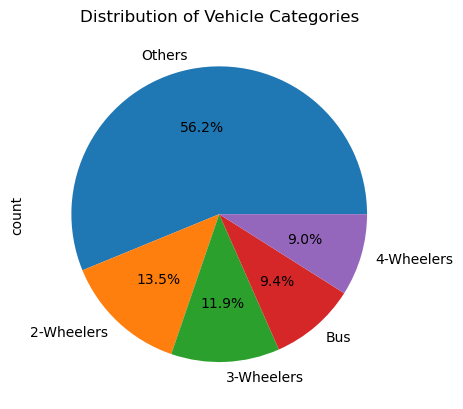

In [7]:
data['Vehicle_Category'].value_counts().plot(kind = 'pie',autopct='%1.1f%%')
plt.title('Distribution of Vehicle Categories')
plt.show()

In [8]:
data['EV_Sales_Quantity'] = data['EV_Sales_Quantity'].replace([float('inf'), -float('inf')], float('nan')).fillna(0)

#### State-Level Performance

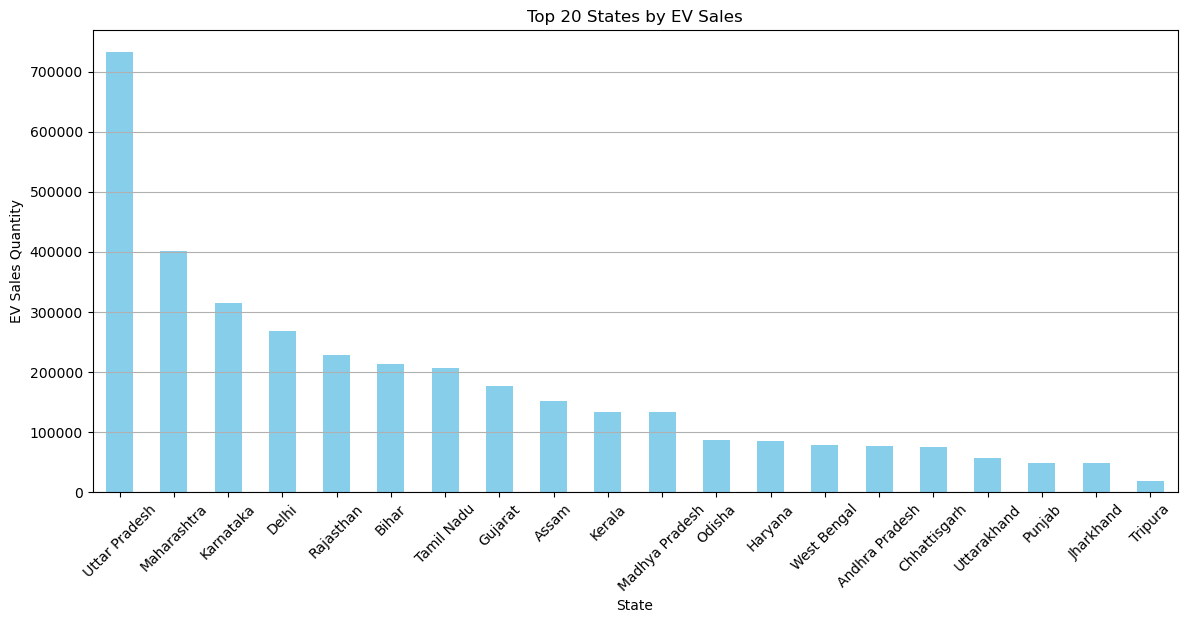

In [9]:
state_sales = data.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
state_sales.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 States by EV Sales')
plt.xlabel('State')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

####  Vehicle Class Distribution

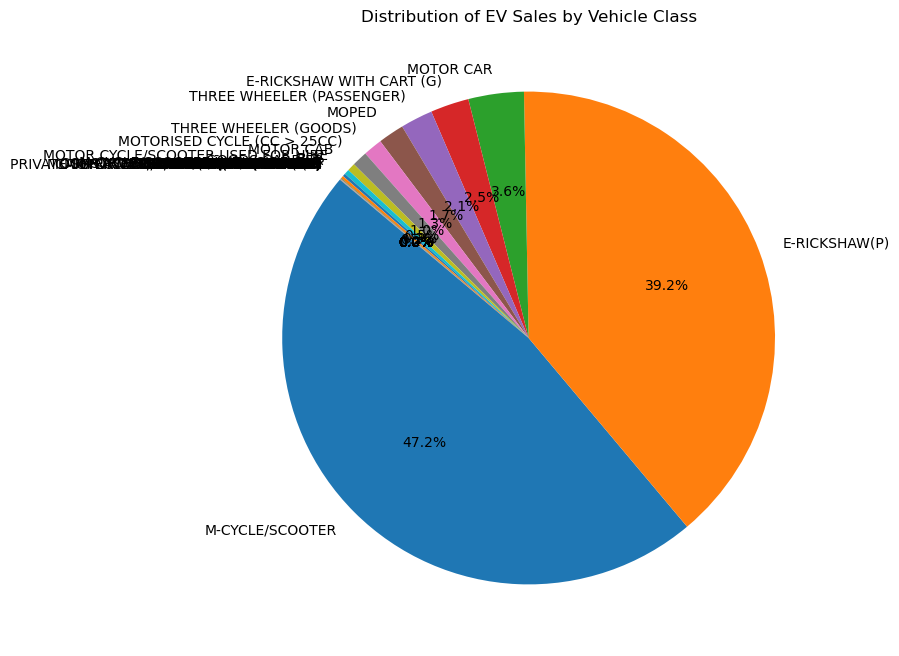

In [10]:
vehicle_class_sales = data.groupby('Vehicle_Class')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
vehicle_class_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140,)
plt.title('Distribution of EV Sales by Vehicle Class')
plt.ylabel('')
plt.show()

#### Vehicle Type Popularity

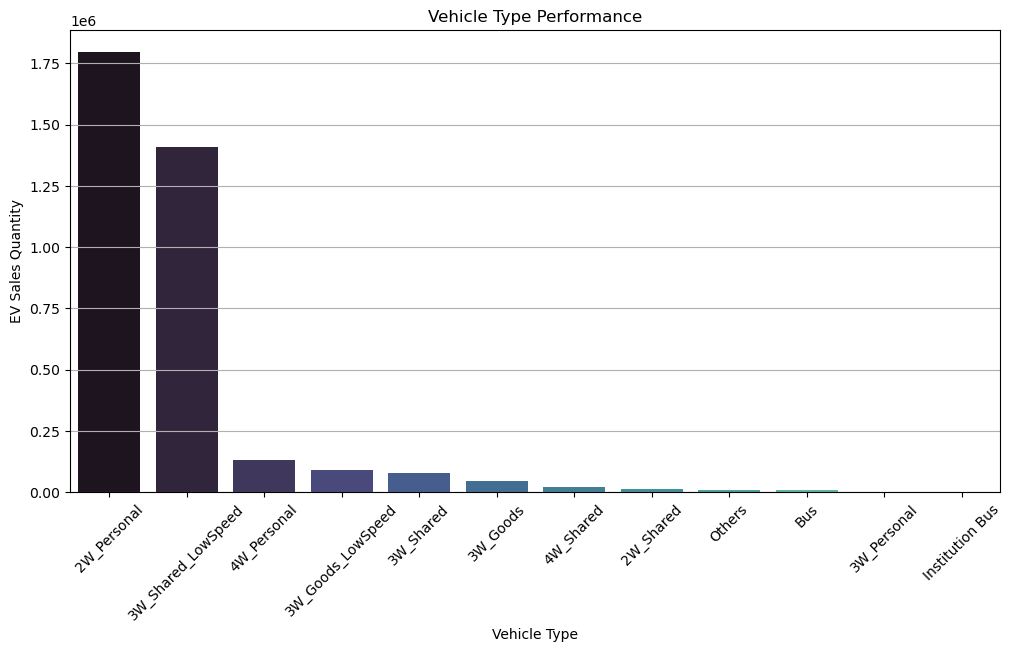

In [11]:
vehicle_type_sales = data.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_type_sales.index, y=vehicle_type_sales.values, palette="mako")
plt.title('Vehicle Type Performance')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Category Contribution to Sales

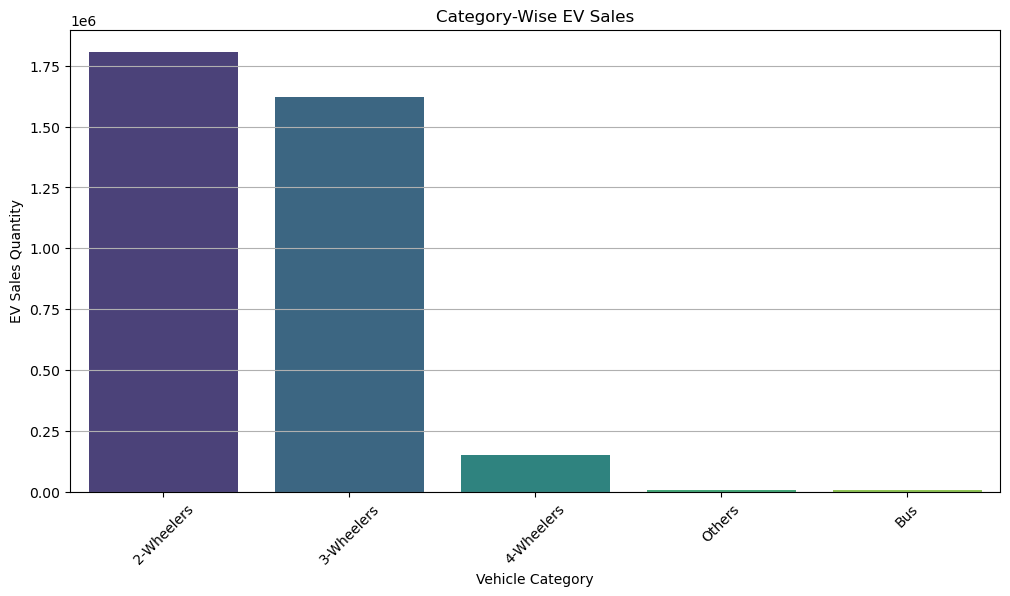

In [12]:
category_sales = data.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette="viridis")
plt.title('Category-Wise EV Sales')
plt.xlabel('Vehicle Category')
plt.ylabel('EV Sales Quantity')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Year-on-Year Growth of Sales

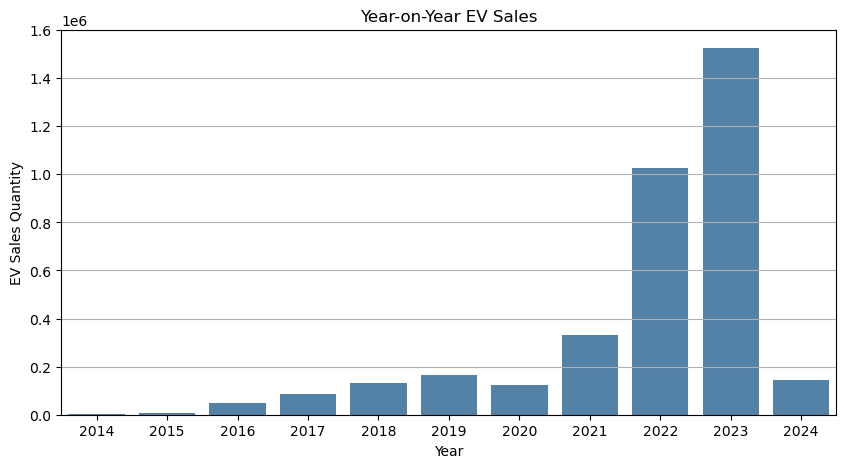

Year-on-Year Growth:
     Year  EV_Sales_Quantity  YoY_Growth
0   2014             2392.0    0.000000
1   2015             7805.0  226.295987
2   2016            49855.0  538.757207
3   2017            87420.0   75.348511
4   2018           130254.0   48.997941
5   2019           166819.0   28.072075
6   2020           124684.0  -25.257914
7   2021           331498.0  165.870521
8   2022          1024723.0  209.118909
9   2023          1525179.0   48.838174
10  2024           143182.0  -90.612118


In [13]:
yearly_sales = data.groupby('Year')['EV_Sales_Quantity'].sum().reset_index()
yearly_sales['YoY_Growth'] = yearly_sales['EV_Sales_Quantity'].pct_change().fillna(0) * 100

plt.figure(figsize=(10, 5))
sns.barplot(x='Year', y='EV_Sales_Quantity', data=yearly_sales, color='steelblue')
plt.title('Year-on-Year EV Sales')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.grid(axis='y')
plt.show()

print("Year-on-Year Growth:\n", yearly_sales)

#### Best Month for EV Sales in Each State

In [14]:
state_month_sales = data.groupby(['State', 'Month_Name'])['EV_Sales_Quantity'].sum().reset_index()
most_sold_month_by_state = state_month_sales.loc[state_month_sales.groupby('State')['EV_Sales_Quantity'].idxmax()]

print("Best Month for EV Sales in Each State:\n", most_sold_month_by_state)

Best Month for EV Sales in Each State:
                         State Month_Name  EV_Sales_Quantity
2    Andaman & Nicobar Island        dec               45.0
19             Andhra Pradesh        mar             8756.0
28          Arunachal Pradesh        jan                7.0
47                      Assam        sep            15541.0
50                      Bihar        dec            24069.0
69                 Chandigarh        nov             1300.0
81               Chhattisgarh        nov            10475.0
88                 DNH and DD        jan               61.0
98                      Delhi        dec            30097.0
117                       Goa        nov             1959.0
130                   Gujarat        oct            18290.0
134                   Haryana        dec             9306.0
153          Himachal Pradesh        nov              336.0
166         Jammu and Kashmir        oct             1838.0
177                 Jharkhand        nov             5693.0


#### Statewise Market Share

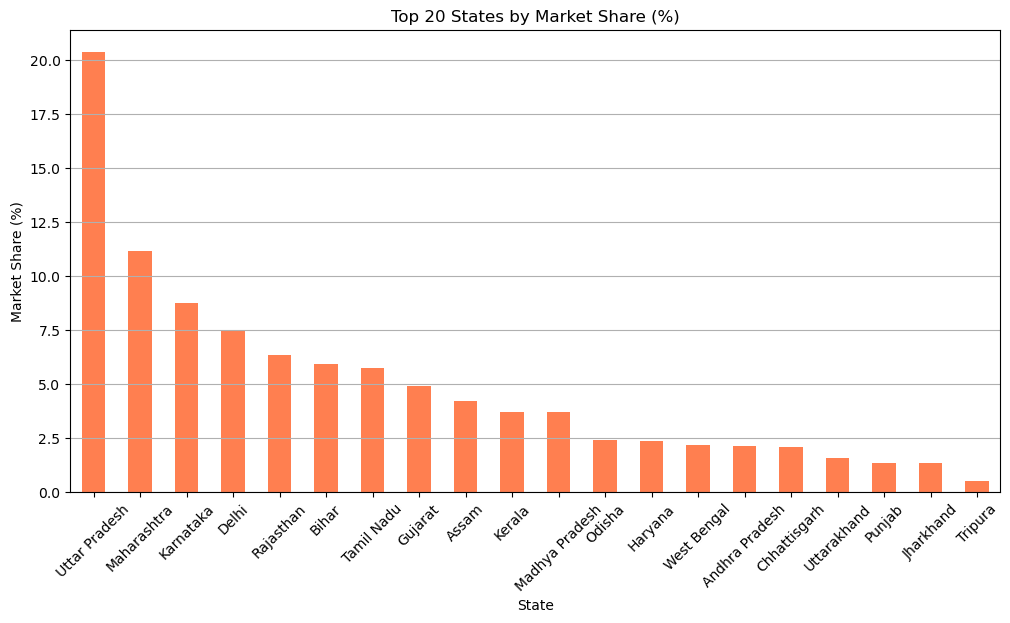

In [15]:
total_sales = data['EV_Sales_Quantity'].sum()
state_market_share = (state_sales / total_sales) * 100

plt.figure(figsize=(12, 6))
state_market_share.head(20).plot(kind='bar', color='coral')
plt.title('Top 20 States by Market Share (%)')
plt.xlabel('State')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Monthly and Yearly Trends

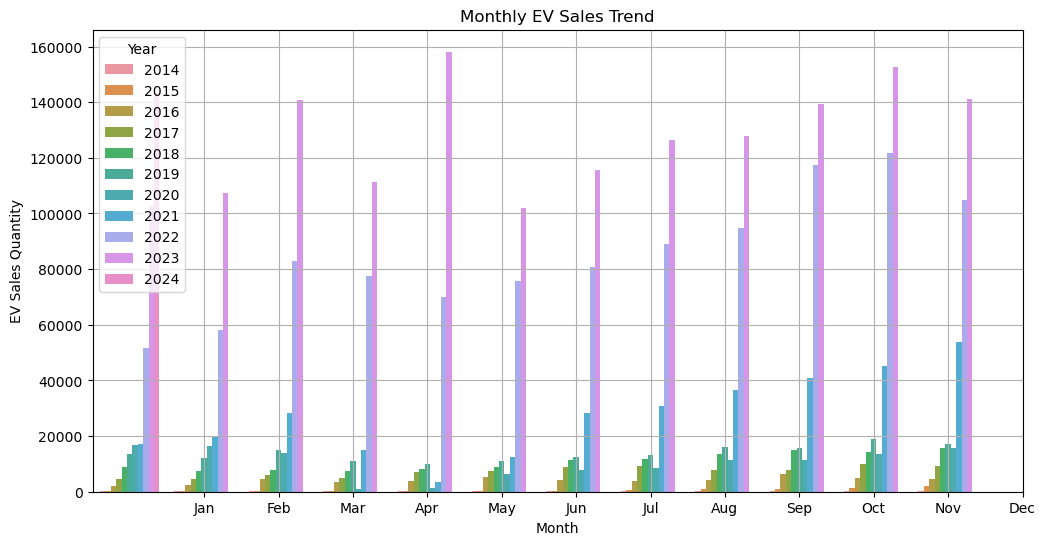

In [16]:
monthly_sales = data.groupby(['Year', 'Month_Name'])['EV_Sales_Quantity'].sum().reset_index()
monthly_sales['Month_Num'] = pd.to_datetime(monthly_sales['Month_Name'], format='%b', errors='coerce').dt.month
monthly_sales = monthly_sales.sort_values(by=['Year', 'Month_Num'])

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month_Num', y='EV_Sales_Quantity', hue='Year')
plt.title('Monthly EV Sales Trend')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('EV Sales Quantity')
plt.legend(title='Year')
plt.grid()
plt.show()

### State Growth Over Time

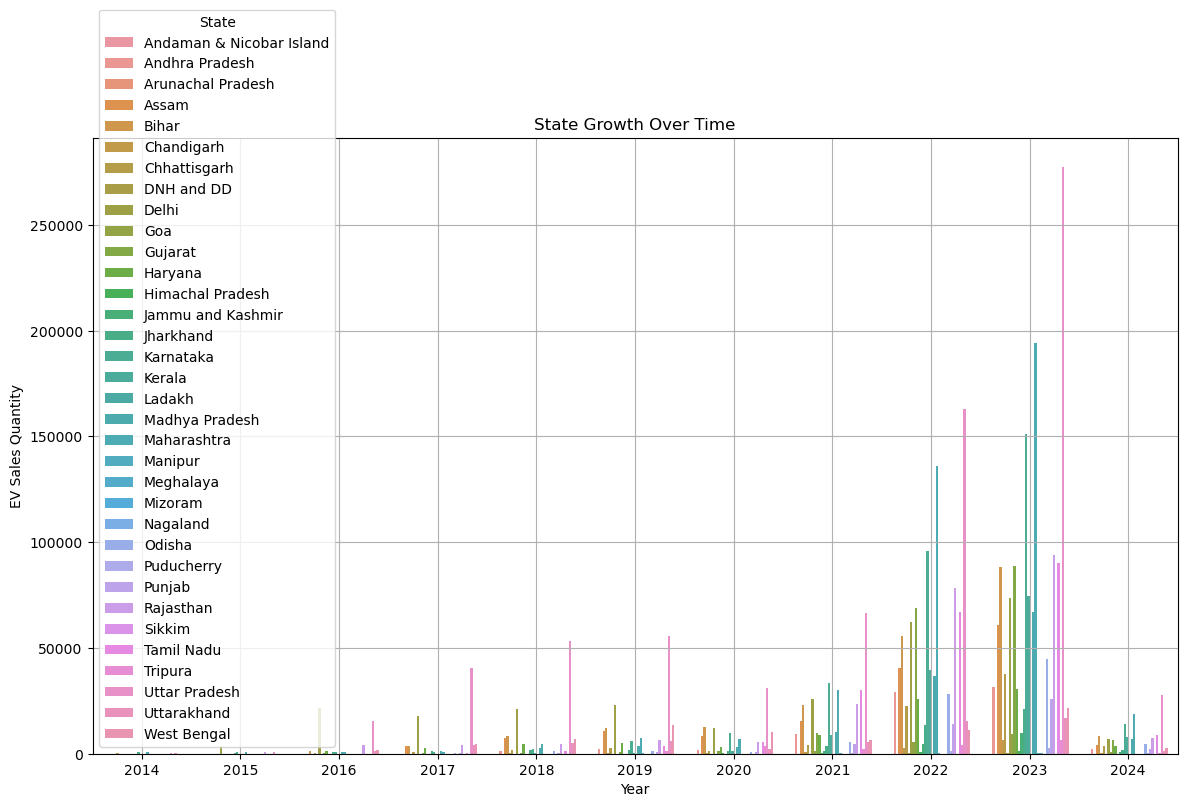

In [17]:
state_yearly_sales = data.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=state_yearly_sales, x='Year', y='EV_Sales_Quantity', hue='State')
plt.title('State Growth Over Time')
plt.xlabel('Year')
plt.ylabel('EV Sales Quantity')
plt.grid()
plt.show()

## Conclusion

# 📊 Insights from EV Sales Analysis

## 1️⃣ Sales Trends and Patterns
- **How have EV sales changed over time?**
- **What seasonal or monthly trends can be observed?**

## 2️⃣ State-Wise Analysis
- **Which states contribute the most to EV sales?** 🏆
- **Which states have the lowest EV adoption rates?** 🚗💨

## 3️⃣ Vehicle Class and Type
- **Vehicle Class Distribution** (e.g., SUV, Sedan, Hatchback)
- **Vehicle Type Popularity** (e.g., BEV, PHEV, Hybrid)

## 4️⃣ Category-Based Insights
- **Category Contribution**
- **Cross-Analysis of Class and Category** 🔍

## 5️⃣ Growth and Performance Metrics
- 📈 **Year-on-Year Growth Trends**
- 🏅 **Top/Bottom Performing States and Classes**